In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
import xgboost2
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)
plt.style.library['seaborn-whitegrid']
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 16})

In [2]:
# import dataframes
X_train = pd.read_csv('./data/X_train_adult.csv')
X_test = pd.read_csv('./data/X_test_adult.csv')
y_train = pd.read_csv('./data/y_train_adult.csv')
y_test = pd.read_csv('./data/y_test_adult.csv')

print(X_train.shape)
print(y_train.values.shape)
print(y_train.columns)

(26048, 14)
(26048, 3)
Index(['Unnamed: 0', 'id', 'income'], dtype='object')


In [39]:
def test_parameter_range(x_train, x_test, y_train, y_test, train_num, trial_num, parameter, parameter_range, parameters=None):
    if not parameters:
        parameters = {
            'reg': 0.5,
            'gamma': 2.0,
            'feature_sel': 0.8,
            'max_depth': 15,
            'min_child_weight': 2.0,
            'min_num_leaf': 10,
            'boosting_rounds': 5,
            'lr': 0.5
        }
        
    accs = np.zeros((len(parameter_range), trial_num))
    
    for idx, each in enumerate(parameter_range):
        parameters[parameter] = each 
        
        for trial in range(trial_num):
            print('training model, {} = {}, trial {}'.format(parameter, each, trial))
            
            # randomly sample data
            np.random.seed(trial)
            rand_ind = np.random.choice(x_train.shape[0], train_num, replace=False)
            x = x_train[rand_ind, :]
            y = y_train[rand_ind]
            
            model = xgboost2.XGBoostClassifier()
            model.fit(x, y,
                     reg = parameters['reg'],
                     gamma = parameters['gamma'],
                     feature_sel = parameters['feature_sel'],
                     max_depth = parameters['max_depth'],
                     min_child_weight = parameters['min_child_weight'],
                     min_num_leaf = parameters['min_num_leaf'],
                     boosting_rounds = parameters['boosting_rounds'],
                     lr = parameters['lr'])
            
            pred = model.predict(x_test)
            accs[idx, trial] = np.sum(pred == y_test)/len(pred)
            
    return accs

In [91]:
def parameter_plot(data, xvals, xlabel='x', ylabel='accuracy', title='parameter tuning'):
    plot_mean = np.mean(data, axis=1)
    std_dev = np.std(data, axis=1)
    
#     (fig_width, fig_height) = plt.rcParams['figure.figsize']
#     fig_size = [fig_width * 2, fig_height / 2]
#     fig, ax = plt.subplots(figsize=fig_size)

    fig = plt.figure()
    
    plt.errorbar(xvals, plot_mean, yerr=std_dev, capsize=4,
                linewidth=3, color='crimson')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.title(title)
    
    return fig
    

In [ ]:
parameter_ranges = {
    'boosting_rounds': [1, 4,7,10,13,16],
    'max_depth': [1,2,4,6,8,10],
    'min_num_leaf': [5,7,9,11,13,15],
    'min_child_weight': [1,3,5,7,9,11],
    'gamma': [1, 2, 4, 61, 8, 10],
    'reg': [0.001, 0.01, 0.1, 1, 1.5, 2],
    'lr': [0.1, 0.5, 0.8, 1.2, 1.5, 2]
}

parameter_acc = {
    'boosting_rounds': None,
    'max_depth': None,
    'min_num_leaf': None,
    'min_child_weight': None,
    'gamma': None,
    'reg': None,
    'lr': None
}

train_num = 10000
trial_num = 3

for key in parameter_ranges.keys():
    parameter_acc[key] = test_parameter_range(X_train.values, 
                        X_test.values, 
                        y_train['income'].values, 
                        y_test['income'].values,
                        train_num,
                        trial_num,
                        key,
                        parameter_ranges[key])
    print(key)
    print(parameter_acc)


training model, boosting_rounds = 1, trial 0
boosting round 0
training model, boosting_rounds = 1, trial 1
boosting round 0
training model, boosting_rounds = 1, trial 2
boosting round 0
training model, boosting_rounds = 4, trial 0
boosting round 0
boosting round 1
boosting round 2
boosting round 3
training model, boosting_rounds = 4, trial 1
boosting round 0
boosting round 1
boosting round 2
boosting round 3
training model, boosting_rounds = 4, trial 2
boosting round 0
boosting round 1
boosting round 2
boosting round 3
training model, boosting_rounds = 7, trial 0
boosting round 0
boosting round 1
boosting round 2
boosting round 3
boosting round 4
boosting round 5
boosting round 6
training model, boosting_rounds = 7, trial 1
boosting round 0
boosting round 1
boosting round 2
boosting round 3
boosting round 4
boosting round 5
boosting round 6
training model, boosting_rounds = 7, trial 2
boosting round 0
boosting round 1
boosting round 2
boosting round 3
boosting round 4
boosting round 5


boosting round 1
boosting round 2
boosting round 3
boosting round 4
training model, min_num_leaf = 13, trial 0
boosting round 0
boosting round 1
boosting round 2
boosting round 3
boosting round 4
training model, min_num_leaf = 13, trial 1
boosting round 0
boosting round 1
boosting round 2
boosting round 3
boosting round 4
training model, min_num_leaf = 13, trial 2
boosting round 0
boosting round 1
boosting round 2
boosting round 3
boosting round 4
training model, min_num_leaf = 15, trial 0
boosting round 0
boosting round 1
boosting round 2
boosting round 3
boosting round 4
training model, min_num_leaf = 15, trial 1
boosting round 0
boosting round 1
boosting round 2
boosting round 3
boosting round 4
training model, min_num_leaf = 15, trial 2
boosting round 0
boosting round 1
boosting round 2
boosting round 3
boosting round 4
min_num_leaf
{'boosting_rounds': array([[0.77521879, 0.7779825 , 0.77414402],
       [0.80822969, 0.81345002, 0.81068632],
       [0.81298941, 0.81928451, 0.8128358

In [107]:
for key in parameter_acc.keys():
    print(key)
    print(parameter_acc[key])

boosting_rounds
[[0.76585291 0.76984493 0.72946415 0.75971135 0.76800246]
 [0.79610011 0.79072624 0.7779825  0.77583295 0.79456472]
 [0.8046983  0.80822969 0.7933364  0.79364348 0.80592661]
 [0.81360356 0.81360356 0.79594657 0.80147398 0.81360356]
 [0.80945801 0.81053278 0.80132044 0.80500537 0.81053278]
 [0.81283587 0.81222171 0.80423768 0.80884385 0.81329648]]
max_depth
[[0.72439736 0.72009827 0.73652695 0.71242131 0.71718102]
 [0.79917089 0.80761554 0.79579303 0.77153386 0.79871027]
 [0.79840319 0.7941041  0.77690772 0.78919085 0.79517887]
 [0.78750192 0.79794258 0.79087978 0.78888377 0.78473822]
 [0.79256871 0.79256871 0.78504529 0.80362352 0.78995854]
 [0.80377706 0.79563949 0.78627361 0.79395056 0.79026562]]
min_num_leaf
[[0.80331644 0.79471826 0.78612007 0.79011208 0.79871027]
 [0.80331644 0.79471826 0.78612007 0.79011208 0.79871027]
 [0.80331644 0.79471826 0.78612007 0.79011208 0.79871027]
 [0.80070628 0.79579303 0.78289575 0.78473822 0.80254875]
 [0.79195455 0.79502533 0.77890

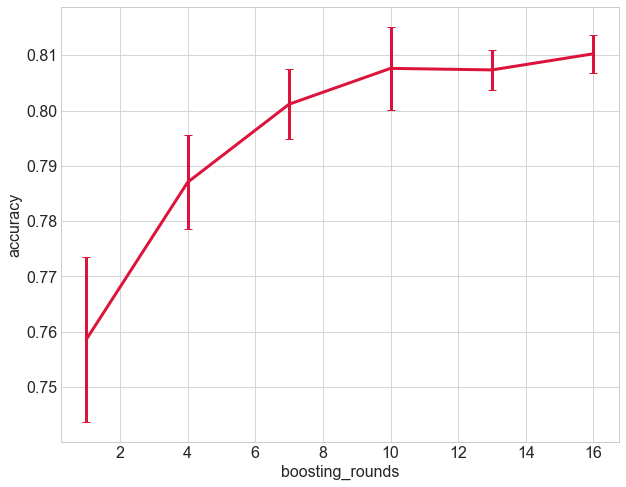

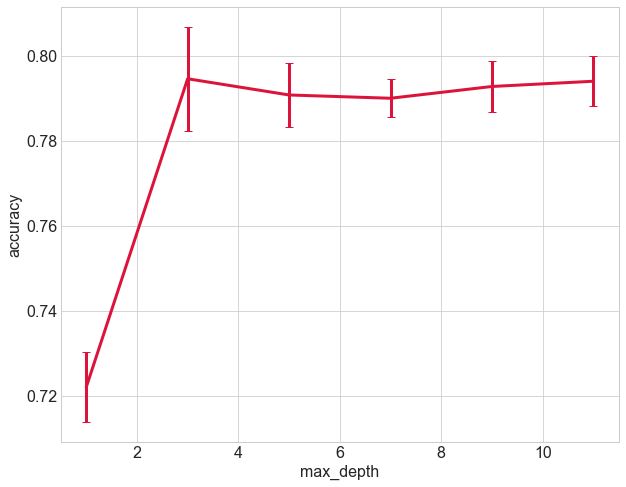

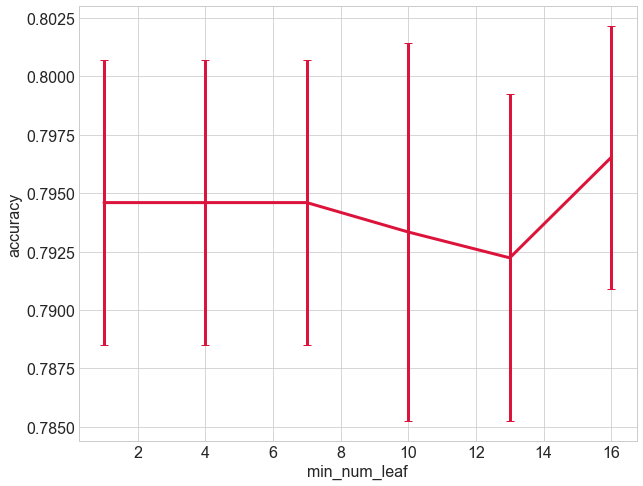

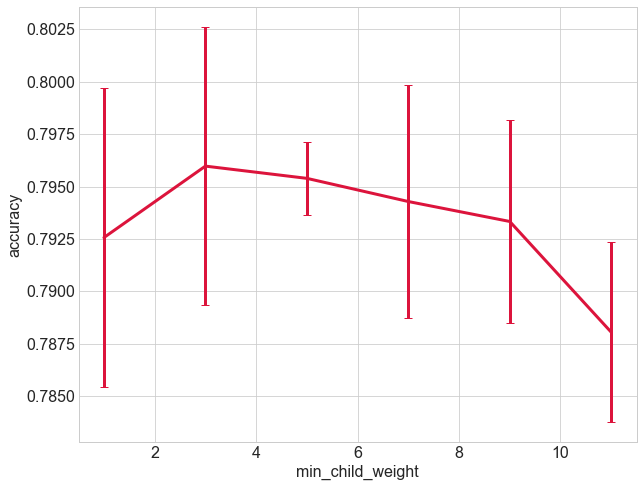

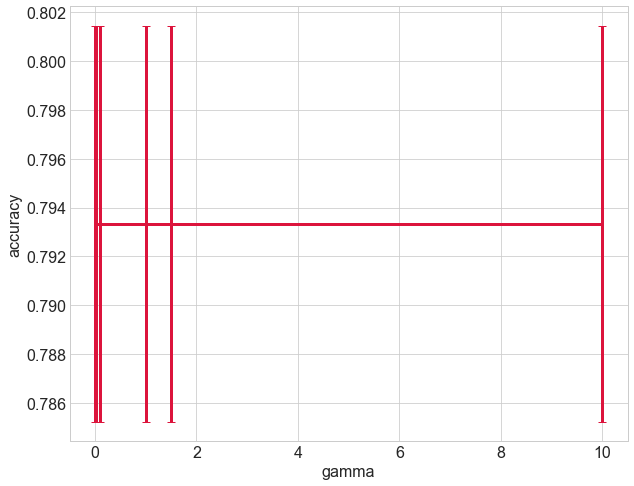

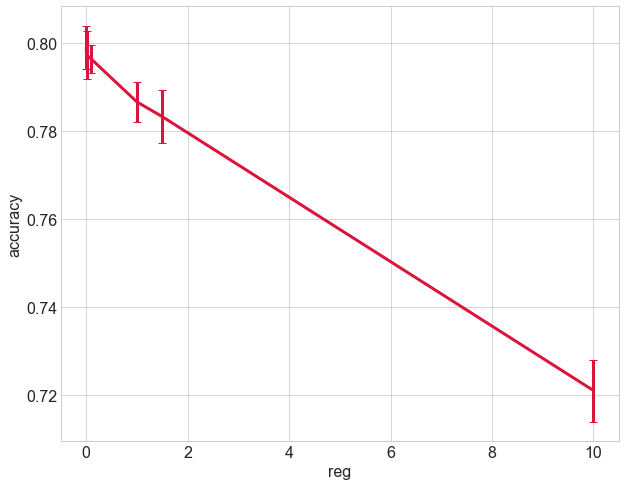

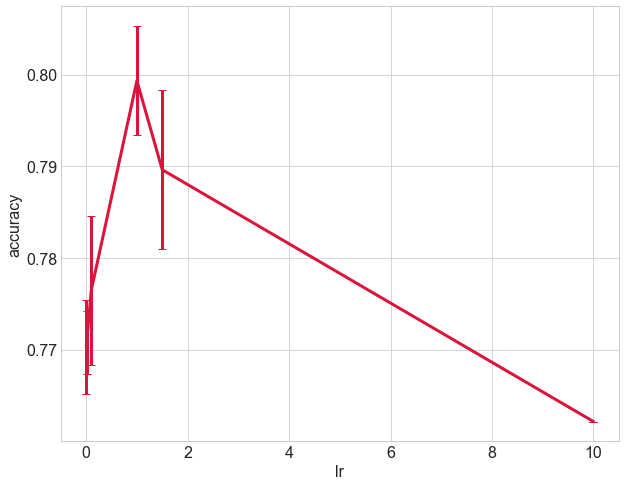

In [108]:
for key in parameter_acc.keys():
    fig = parameter_plot(parameter_acc[key], 
               parameter_ranges[key], 
               xlabel=key)
    plt.show()

In [110]:
# old, use new preprocessing

# # preprocess data

# # remove incomplete samples
# df[df=='?']=np.nan  # replace ? with nan
# n_rows = len(df)
# df=df.dropna(axis=0) # drop any rows with nan values
# n_dropped = n_rows - len(df)
# print('dropped {} rows out of {}'.format(n_dropped, n_rows))

# # set classification column to binary
# df['income'].replace({'<=50K':0,'>50K':1},inplace=True)

# df = df.drop('education.num',axis=1) # remove education num column, since redundant
# df = df.drop('fnlwgt', axis=1) # shown to have negative correlation 
# df.shape

# # encode categorical features with label encoding, not one-hot encoding
# cat_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
# for feature in cat_features:
#     labelencoder = LabelEncoder()
#     df[feature] = labelencoder.fit_transform(df[feature])
# df

# randomly generate train and test sets


# x_df = df.drop(['income'], axis=1)
# y_df = df['income']

# data_train, data_test, labels_train, labels_test = train_test_split(x_df.values, y_df.values, test_size=0.2, random_state=1)